In [7]:
import sqlite3
import pandas as pd

co2_conn = sqlite3.connect('datasets/co2.sqlite')
population_conn = sqlite3.connect('datasets/population.sqlite')

co2_data = pd.read_sql("SELECT * FROM co2_emissions;", co2_conn)
population_data = pd.read_sql("SELECT * FROM population;", population_conn)

print("CO2 Emissions Data:")
display(co2_data.head(3))

print("\nPopulation Data:")
display(population_data.head(3))

CO2 Emissions Data:


,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,304614.720181,300135.943094,296834.691723,305267.779142,314596.287085,329784.557767,342368.178325,358278.381587,...,525337.889289,546775.865,568547.519,591680.972,576265.992,580219.242,590905.482,598720.9575,610723.50,544952.503
1,Afghanistan,AFG,2046.870000,1941.370000,1525.470000,1527.890000,1493.590000,1457.690000,1407.300000,1344.100000,...,11961.890000,10208.130,9402.050,9281.340,10057.590,9294.930,10022.780,10972.3800,11238.83,8709.470
2,Africa Western and Central,AFW,97190.345000,110559.933800,121628.003000,114995.869000,106198.491000,116198.614000,134252.745000,134320.486000,...,165498.494900,170350.670,186486.660,196343.630,194363.640,201399.220,200550.900,210618.8900,222990.35,215915.610



Population Data:


,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,65712.0,67864.0,70192.0,72360.0,74710.0,77050.0,79417.0,81858.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,Africa Eastern and Southern,AFE,309890664.0,318544083.0,326933522.0,335625136.0,344418362.0,353466601.0,362985802.0,372352230.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,Afghanistan,AFG,10694796.0,10745167.0,12057433.0,14003760.0,15455555.0,16418912.0,17106595.0,17788819.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0


In [21]:
from IPython.display import display

# Calculate population growth for each country
population_data['Population_Growth'] = ((population_data['2020'] - population_data['1990']) / population_data['1990']) * 100

# Calculate CO2 emissions growth for each country
co2_data['CO2_Growth'] = co2_data.apply(
    lambda row: ((row['2020'] - (row['1990'] if row['1990'] != 0 else 1)) / (row['1990'] if row['1990'] != 0 else 1)) * 100, 
    axis=1
)

# Merge the two datasets
merged_data = pd.merge(population_data[['Country Name', 'Country Code', 'Population_Growth']],
                       co2_data[['Country Name', 'Country Code', 'CO2_Growth']],
                       on=['Country Name', 'Country Code'])


merged_data['CO2_Population_Growth_Ratio'] = merged_data.apply(lambda row: row['CO2_Growth'] / row['Population_Growth'] if row['Population_Growth'] != 0 else float('inf'), axis=1)

ranked_data = merged_data.sort_values(by='CO2_Population_Growth_Ratio').reset_index(drop=True)
ranked_data = ranked_data.round({'Population_Growth': 2, 'CO2_Growth': 2, 'CO2_Population_Growth_Ratio': 2})

print("Top 10 countries with the lowest ratio of CO2 emissions growth to population growth:")
display(ranked_data[['Country Name', 'Population_Growth', 'CO2_Growth', 'CO2_Population_Growth_Ratio']].head(10))


Top 10 countries with the lowest ratio of CO2 emissions growth to population growth:


,Country Name,Population_Growth,CO2_Growth,CO2_Population_Growth_Ratio
0,Marshall Islands,-5.72,10900.00,-1905.51
1,St. Vincent and the Grenadines,-6.98,166.10,-23.79
2,Slovak Republic,3.01,-47.03,-15.61
3,Czechia,3.53,-41.99,-11.91
4,Germany,4.69,-36.84,-7.85
5,Greece,4.92,-32.55,-6.62
6,Italy,4.79,-30.59,-6.38
7,Cuba,6.34,-31.70,-5.00
8,European Union,6.52,-30.91,-4.74
9,Denmark,13.43,-47.37,-3.53


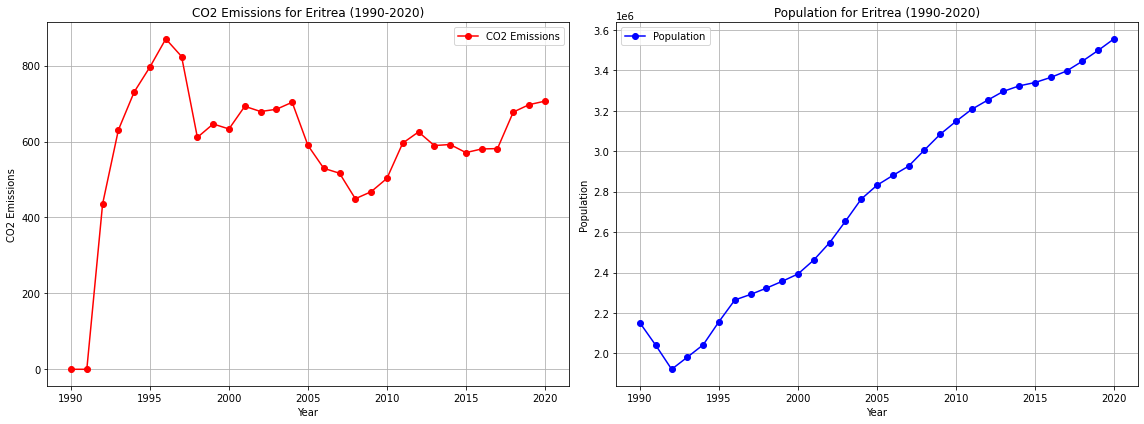

In [23]:
import matplotlib.pyplot as plt

country = 'Eritrea'
country_co2_data = co2_data[co2_data['Country Name'] == country].squeeze()
country_population_data = population_data[population_data['Country Name'] == country].squeeze()

years = range(1990, 2021)
co2_emissions = [country_co2_data[str(year)] for year in years]
population = [country_population_data[str(year)] for year in years]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))


axes[0].plot(years, co2_emissions, label='CO2 Emissions', color='r', marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('CO2 Emissions')
axes[0].set_title(f'CO2 Emissions for {country} (1990-2020)')
axes[0].grid(True)


axes[1].plot(years, population, label='Population', color='b', marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Population')
axes[1].set_title(f'Population for {country} (1990-2020)')
axes[1].grid(True)
axes[0].legend()
axes[1].legend()
plt.tight_layout()

plt.show()


The country with the highest ratio of CO2 emissions growth to population growth:


,Country Name,Population_Growth,CO2_Growth,CO2_Population_Growth_Ratio
237,Eritrea,65.39,70540.0,1078.72


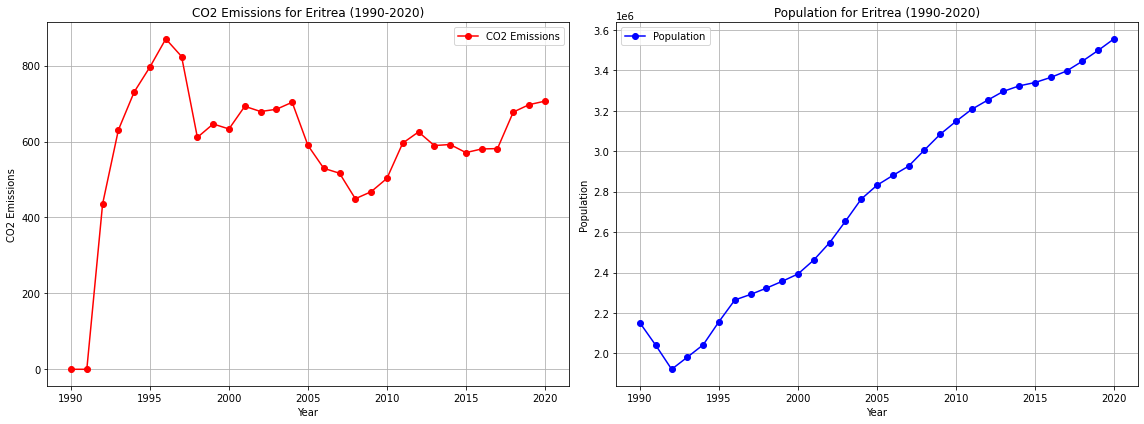

In [20]:
print("The country with the highest ratio of CO2 emissions growth to population growth:")
display(ranked_data[['Country Name', 'Population_Growth', 'CO2_Growth', 'CO2_Population_Growth_Ratio']].tail(1))

country = 'Eritrea'
country_co2_data = co2_data[co2_data['Country Name'] == country].squeeze()
country_population_data = population_data[population_data['Country Name'] == country].squeeze()

years = range(1990, 2021)
co2_emissions = [country_co2_data[str(year)] for year in years]
population = [country_population_data[str(year)] for year in years]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))


axes[0].plot(years, co2_emissions, label='CO2 Emissions', color='r', marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('CO2 Emissions')
axes[0].set_title(f'CO2 Emissions for {country} (1990-2020)')
axes[0].grid(True)


axes[1].plot(years, population, label='Population', color='b', marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Population')
axes[1].set_title(f'Population for {country} (1990-2020)')
axes[1].grid(True)
axes[0].legend()
axes[1].legend()
plt.tight_layout()

plt.show()
